# Module 5 Part 3:  Introduction to Bootstrap

This module consists of 3 parts:

**Part 1** - Introduction

**Part 2** - The Chi-Square Distribution

**Part 3** - Introduction to Bootstrap

Each part is provided in a separate notebook file. It is recommended that you follow the order of the notebooks.

# Table of Contents
    
* [Introduction to Bootstrap](#Introduction_to_Bootstrap)
    * [Theoretical background](#Theoretical_background)
    * [Bootstrap examples](#Bootstrap_examples)


* [References](#References)

<a id='Introduction_to_Bootstrap'></a>
# Introduction to Bootstrap

Traditional methods for estimating confidence intervals and hypothesis testing rely on distribution assumptions also called **parametric assumptions**.  Many of these assumptions are not met in many applications.  Besides, theoretical solutions (other than mean and variances) are very complex and thus out of reach from most practioners.  

Today with the available computing power, **computational approaches** to the estimations of confidence intervals are more accessible.  Computational approaches are empirical and do not require theoretical assumptions.  The most widely known techniques are the **jacknife** and **bootstrap**.  Bootstrap is a historical extension of the Jacknife method and will be covered in this module.

The bootstrap method was introduced in 1979 by Bradley Efron. "The use of the term bootstrap derives from the phrase *to pull oneself up by one's bootstrap*, widely thought to be based on one of the eighteenth century Adventures of Baron Munchause by Rudolph Erich Raspe." (Efron & Tibshinari, 1994).  In summary, bootstrap is a computer intensive technique to assess the accuracy of estimates.  Because it does not rely on parametric, i.e. normality assumptions, it is empirically based on the data available, it can applied to different statistics and different distributions.

There are different bootstrap methodologies. In the remaining sections of this module we will cover empirical non-parametric bootstrap and mention the two most common methods to determine confidence intervals, the **percentile interval** and **$BC_{a}$** (bias corrected and accelerated).

The applications of bootstrap are very broad: standard error estimation of non-normal statistics, linear and logistic regression, time series analysis, and discriminant analysis, to name a few.  Its application in machine learning is also very broad.

<a id='Theoretical_background'></a>
## Theoretical background

Bootstrap assesses the accuracy of a sample statistic by applying computer intensive **resampling with replacement**.  

The process goes as follows:

1. A sample of size *n* is withdrawn from an unknown distribution _F_. </br>
  $$F \rightarrow X=(x_1, x_2,..,x_n)$$  
  By unknown in this context, we understand that we don't have a census of the population, in which case we could use the relative frequencies as probabilities.  Or equivalently, we don't have any extra information about $F$ other than the sample, i.e., no parametric assumption such as the population follows a normal/binomial/other known distribution.


2. The sample of size n is sampled with replacement with a sample size of n _B_ times.  These are called bootstrap samples.  We will denote each sample as $X^{i}$ for i=1, 2, ...B.
 
 
3. The B bootstrap samples $X^{i}$ are used to calculate the statistic of interest $S^{i}=S(X^{i})$.


4.  The distribution of the _B_ bootstrap samples statistic $S(X^{i})$ is used to calculate the estimated confidence interval of the statistic of interest.

There are some considerations to think about:

Each of the samples within a Bootstrap sample have to be independent and identically distributed random variables.  Practically, samples are chosen using a random generating number algorithm following a Monte Carlo approach (more on this aproach in a later module).  The random generating algorithm selects n numbers between 1 to n (numbers can be repeated many times or not present at all) where each number has a $\frac{1}{n}$ of being selected.  The random number works as an index - it determines wich element of the sample is selected.  The process is repeated B times.  Because each element of the sample has the same probability of being selected, they are independent from each other. Because they are sampled from the same population sample, they will be identically distributed.

F does not need to be known in this process.  However the standard rules of probability apply:

*  Probabilities are defined as relative frequencies.

*  Each probability has a value between zero and one.
   $$0\leq P(x_i) \leq 1$$
   
*  The total probability of the *sample space*, the collection of all possible values, equals to 1
  $Prob\{S_x\}= \sum f_k=1$

The **population sample** has an empirical distribution $\widehat{F}$ which at this point is the best estimate of the population distribution $F$.  The empirical distribution of a sample of size n is the distribution that assigns a $\frac{1}{n}$ probability to each value $x_i$.  In other words the empirical distribution is the list of values of the sample where each probability will be the relative frequency in the sample.
$\widehat{f_k} =\# \{ x_{i}=k \} /n$.

The bootstrap process described above generates a bootstrap distribution $F^*$ which is an estimate of $\widehat F$.  Like in theoretical statistics, $\widehat F$ is an estimation of $F$.  

The key idea of the bootstrap method is that for an n that is sufficiently large, the variability of $F^*$, $\widehat F$ and $F$ converge.

The Glivenko–Cantelli theorem formally proves that they converge (Efron & Tibshinari, 1994).  This is fundamental theoretical background of the bootstrap method.  This was received by skepticism at the beginning, so the method took time to be widely applied. Today, it is validated and well established.




<a id='Bootstrap_examples'></a>
## Bootstrap examples

In this section, we will apply the bootstrap methods to some created examples for illustrative purposes.

First, let's import the libraries.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Let's create a distribution that we will imagine it is unknown.  First we will show that the empirical distribution resembles the population distribtution.

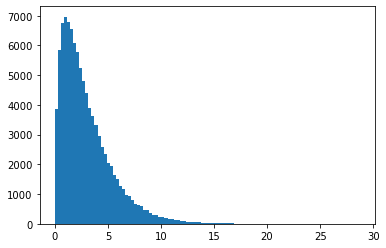

In [2]:
np.random.seed(123)
x=np.random.chisquare(df=3,size=100000)
plt.hist(x,bins=100)
plt.show()

Take a sample from the population.  
**NOTE:** This is done this way for illustrative purposes only, we could have generated the sample using the same statement as in the above cell using a size equal to the sample size.

/Users/sergiynokhrin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
/Users/sergiynokhrin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


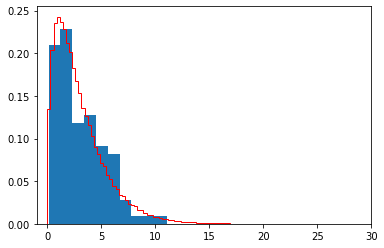

In [3]:
np.random.seed(123)
sample_size=100
x_sample=np.random.choice(x,size=sample_size)
plt.hist(x_sample,normed='true')
plt.hist(x,bins=100,histtype='step',normed='true',color='r')
plt.xlim(-1,30)
plt.show()

It is intuitive to see that if the sample is big, its empirical distribution is a good approximation of the true distribution of the population.  There is nothing new here, however the power of the bootstrap method is to estimate the sampling distribution of different statistics with only one sample.

We will start by creating the sampling distribution of the original population to then try to approximate it by bootstrapping.

Below, we will create the sampling distribution. 
**NOTE:** will keep the sample size small to show the application when the CLT cannot be invoked.

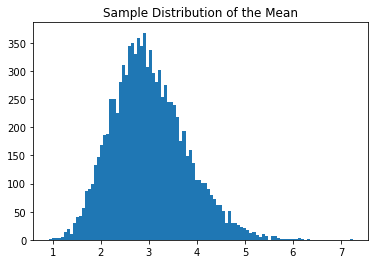

In [4]:
np.random.seed(123)

x_sample_mean_dist=[]

sample_size=10
n_samples=10000

for i in np.arange(0,n_samples):
    x_sample=np.random.choice(x,size=sample_size)
    x_sample_mean=np.mean(x_sample)
    x_sample_mean_dist.append(x_sample_mean)

plt.hist(x_sample_mean_dist,bins=100)
plt.title('Sample Distribution of the Mean')
plt.show()
    
    

The next step is to bootstrap the sample **B** times.  As a statistic, we will use the mean.

In [5]:
np.random.seed(123)

# We will use only one sample
x_sample=np.random.choice(x,size=sample_size)

#Create the index file (this is not the index, 
#it is range with the same numbers as the indeces)
sample_idx=np.arange(0,sample_size)

#set the number of bootstraps
B=100000

# create an empty table to store the bootstrap sample stats
bootstrap_stat=[]

for i in np.arange(0,B):
    #pick 15 rows (indexes) randomly with replacement (default)
    pop_boot_sample_idx=np.random.choice(sample_idx,sample_size,replace=True)


    # sample the records that match with the index
    boot_sample=(x_sample[pop_boot_sample_idx])

    #calculate the average of the sample
    avg_sample_pop=boot_sample.mean()

    #Append the new sample correlation to the sampling distribution df
    bootstrap_stat.append(avg_sample_pop)

In [6]:
pop_boot_sample_idx_0 = np.random.choice(sample_idx, sample_size, replace=True)

sample_idx
print(x_sample)

[1.18439581 3.65472758 1.34327077 5.80941391 4.28856932 2.0349223
 5.77215678 1.07193871 2.24602958 3.74596661]


/Users/sergiynokhrin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # Remove the CWD from sys.path while we load stuff.
/Users/sergiynokhrin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


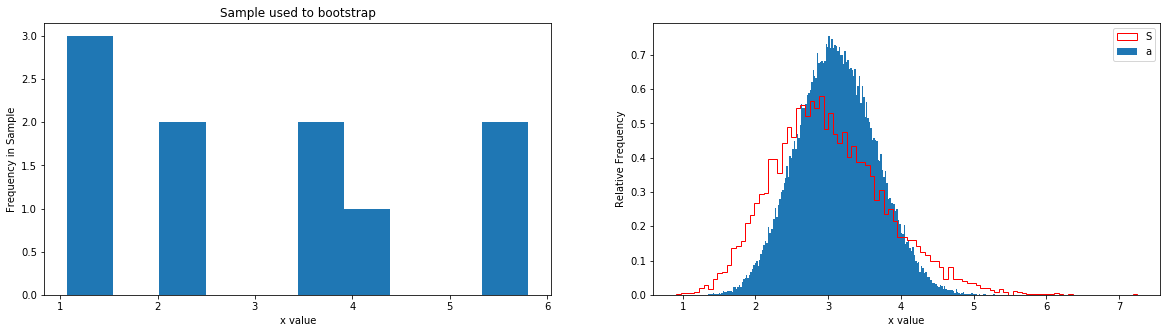

In [7]:
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.hist(x_sample)
plt.title('Sample used to bootstrap')
plt.xlabel('x value')
plt.ylabel('Frequency in Sample')

plt.subplot(122)
plt.hist(bootstrap_stat,bins=200,normed='true',rwidth=1)
plt.legend('Bootstrap Distribution')
plt.hist(x_sample_mean_dist,bins=100,histtype='step',normed='true',color='r')
plt.legend('Sample Mean Distribution')
plt.xlabel('x value')
plt.ylabel('Relative Frequency')
plt.show()

Note that shape of the original sampling population is reflected in the distribution of the bootstrap samples.  Here you can appreicate the power of boostrapping a sample, from a small sample you could get a very good representation of the sampling distribution.

In [8]:
print('Note, however, that the mean of the bootstrap mean distribution is not centered arournd the mean of the sample distribution %.2f'
      %np.mean(x_sample_mean_dist),
     'but around the sample mean %.2f' %np.mean(x_sample), 'which was the base of the bootstrap sampling.')

Note, however, that the mean of the bootstrap mean distribution is not centered arournd the mean of the sample distribution 3.01 but around the sample mean 3.12 which was the base of the bootstrap sampling.


We will use the findings to explain some important properties of the bootstrap technique.

The distribution of the sample means $\bar X$ is centered around the population mean $\mu$.  The distribution of the bootstrap replications $\bar X^*$ is centered around the single sample mean that was available (hypothetically, in this example we know both).

Bootstrap cannot correct for a sample that is not representative.  However, bootstrap generates information about the variability or shape of the distribution around its center based on only one sample.  In other words, it will not improve the estimate itself, but it can generate a confidence interval when the parametric assumptions, most commonly normality or symmetry, cannot be made or are not met.

We show the overlapped histograms below.  Notice that the bootstrap distribution is a bit narrower than the original one.  To correct for this, different techniques have been developed, the most applied is $BA_c$ is presented later in this section.

/Users/sergiynokhrin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
/Users/sergiynokhrin/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


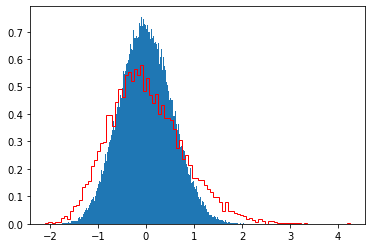

In [9]:
bootstrap_stat_centered = bootstrap_stat-np.mean(x_sample) 
x_sample_mean_dist_centered=x_sample_mean_dist-np.mean(x)

plt.hist(bootstrap_stat_centered,bins=200,normed='true',rwidth=1)
plt.hist(x_sample_mean_dist_centered,bins=100,histtype='step',normed='true',color='r')
plt.show()

The first approach is called the **percentile method**: to estimate the sampling distribution of a statistic based on the distribution of the statistic bootstrap replications is very intuitive and easy to understand, however it will be centered around the only sample available and thus it can be off. 

The second approach applied is called the **empirical bootstrap**: to estimate the distribution around its center. This is recommended, as it is more precise.  The centers may be off, (bootstrap cannot compensate for a bad sample), but the distribution around the centers are distributed following a similar shape.

**Import the libraries**

In [10]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

**Load the data**

In [11]:
# Two files will be usedin this example, 'law82.csv' is complete dataset, this will be used for normal sampling.
# 'law15.csv' is a subset of original dataset with only 15 rows, this subset will be used for bootstrap replication.
law82=pd.read_csv('./module05/law82.csv')
law15=pd.read_csv('./module05/law15.csv')
law82.head(1)

,Unnamed: 0,School,LSAT,GPA
0,1,1,622,3.23


**Create a histogram to see the shape of the original data**

Text(0, 0.5, 'Frequency')

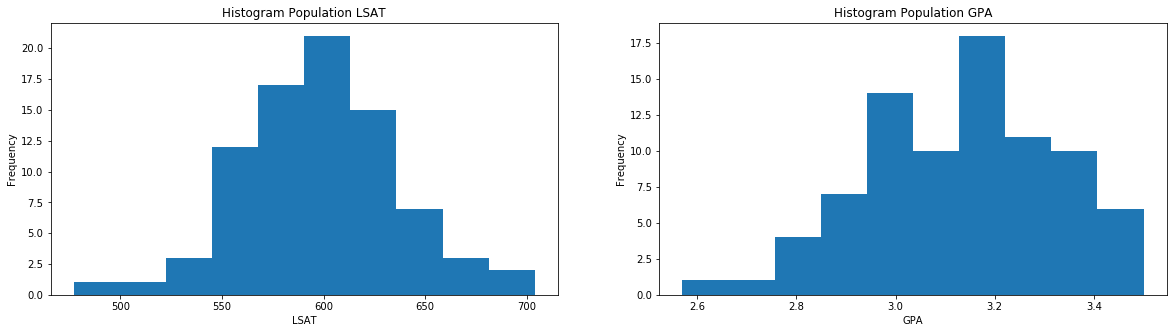

In [12]:
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.hist(law82.LSAT)
plt.title('Histogram Population LSAT')
plt.xlabel('LSAT')
plt.ylabel('Frequency')


plt.subplot(122)
plt.hist(law82.GPA)
plt.title('Histogram Population GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')

**Scatter Plot of the population and sample**

The sample could be created from the original data. We are using a pre-determined sample for demonstration purposes. You can try taking your own sample(s) to experiment with the technique if you like.

(477, 704)

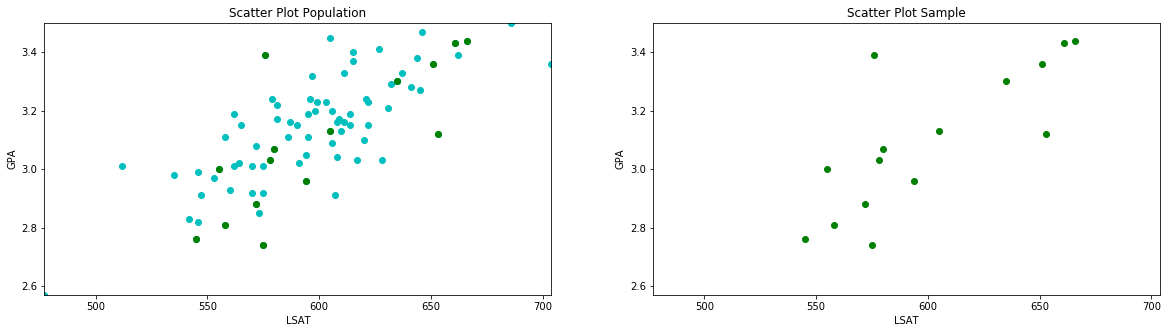

In [13]:
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.scatter(law82.LSAT,law82.GPA,color='c')
plt.scatter(law15.LSAT,law15.GPA,color='green')
plt.title('Scatter Plot Population')
plt.xlabel('LSAT')
plt.ylabel('GPA')
plt.ylim(law82.GPA.min(),law82.GPA.max())
plt.xlim(law82.LSAT.min(),law82.LSAT.max())

plt.subplot(122)
plt.scatter(law15.LSAT,law15.GPA,color='green')
plt.title('Scatter Plot Sample')
plt.xlabel('LSAT')
plt.ylabel('GPA')
plt.ylim(law82.GPA.min(),law82.GPA.max())
plt.xlim(law82.LSAT.min(),law82.LSAT.max())

We will calculate an interval confidence for the correlation using the bootstrap resampling method.  First we will calculate the correlation for the original dataset and the sample.

The corr method of Series computes the correlation of the overlapping, non-NA, aligned-by-index values in two Series. Relatedly, cov computes the covariance.

In [14]:
corr_pop=law82['LSAT'].corr(law82['GPA'])
print("Population LSAT vs. GPA correlation: %.4f"  % corr_pop)

Population LSAT vs. GPA correlation: 0.7600


We want to compare the sampling distribution from the population vs. the bootstrap distribution from the sample.

First we will create random samples from the population.

In [15]:
# Create a file to used it as index
#law82.shape[0] counts the number of rows (records)
#we create an numpy array to use the built in permutation functions later

index_law82=np.arange(0,law82.shape[0])
index_law82

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81])

In [16]:
LSAT = law82['LSAT']
GPA = law82['GPA']

# Create a df for the sampling distribution of correlations
# set the number of samples
# this time we shall pick 15 rows randomly from the law82 dataset
# and calculate the correlation between LSAT and GPA
# this will be compared with bootsrap replication of law15 subset

N = 3200

corr_sampling_dist_pop = []

for i in np.arange(0, N):
    # pick 15 rows (indices) randomly with replacement (default)
    pop_sample_idx = np.random.choice(law82.shape[0], 15, replace = True)
    
    # sample the records that match with the index
    random_sampling_pop = (LSAT[pop_sample_idx], GPA[pop_sample_idx])
    
    # calculate the correlation of the sample
    corr_sample_pop = random_sampling_pop[0].corr(random_sampling_pop[1])
    
    # Append the new sample correlation to the sampling distribution df
    corr_sampling_dist_pop.append(corr_sample_pop) 
    

Now we will calculate a distribution for the sample bootstrap replication

In [17]:
LSAT=law15['LSAT']
GPA=law15['GPA']

#Create a df for the sampling distribution of correlations
# this time we shall bootstrap replicate law15 subset B times.
# For better comparison B is the same number as N in sampling above

B = 3200


corr_sampling_dist_sample=[]

for i in np.arange(0,B):
    #pick 15 rows (indexes) randomly with replacement (default)
    pop_sample_idx=np.random.choice(law15.shape[0],15,replace=True)


    # sample the records that match with the index
    random_sampling_sample=(LSAT[pop_sample_idx],GPA[pop_sample_idx])

    #calculate the correlation of the sample
    corr_sample_sample=random_sampling_sample[0].corr(random_sampling_sample[1])

    #Append the new sample correlation to the sampling distribution df
    corr_sampling_dist_sample.append(corr_sample_sample)

#plt.hist(corr_sampling_dist_sample,bins=20)

Text(0, 0.5, 'Frequency')

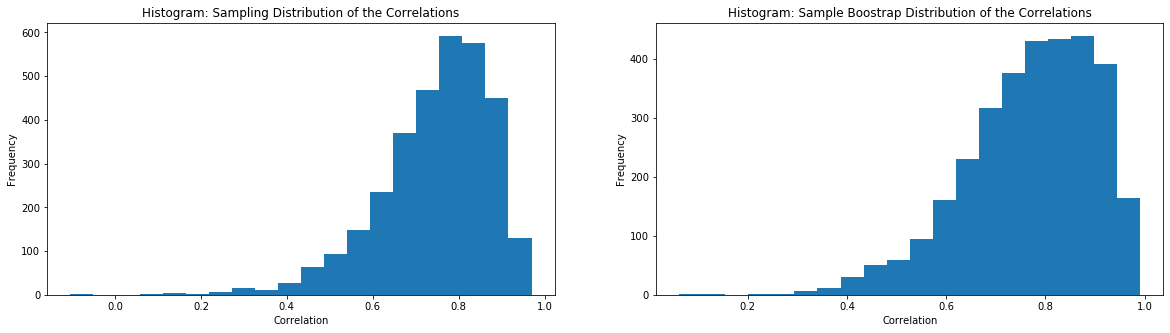

In [18]:
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.hist(corr_sampling_dist_pop,bins=20)
plt.title('Histogram: Sampling Distribution of the Correlations')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
#plt.ylim(0,B/5)

plt.subplot(122)
plt.hist(corr_sampling_dist_sample,bins=20)
plt.title('Histogram: Sample Boostrap Distribution of the Correlations')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
#plt.ylim(0,B/5)


The bootstrap sampling and the population sampling have very similar histograms. Note that both are not normal.  This was created without any assumption made on the population.

Remember that the CLT only applies to sample means. In this case, correlation statistical theory cannot aid us.  However, as we have demonstrated, we can rely on computational methods.

Let's compare our statistics

In [19]:
corr_pop=law82['LSAT'].corr(law82['GPA'])
print("Population LSAT vs. GPA correlation: %.2f"  % corr_pop)

corr_boot_mean=sum(corr_sampling_dist_sample)/len(corr_sampling_dist_sample)
error_corr_boot_mean=corr_boot_mean-corr_pop
print("Population LSAT vs. GPA bootstrap sampling: %.2f"  % corr_boot_mean,', the error vs. the true correlation is %.2f' % error_corr_boot_mean)

corr_sampling_mean=sum(corr_sampling_dist_pop)/len(corr_sampling_dist_pop)
error_corr_sampling_mean=corr_sampling_mean-corr_pop
print("Population LSAT vs. GPA population sampling: %.2f"  % corr_sampling_mean, 'the error vs. the true correlation is %.2f' % error_corr_sampling_mean)

Population LSAT vs. GPA correlation: 0.76
Population LSAT vs. GPA bootstrap sampling: 0.77 , the error vs. the true correlation is 0.01
Population LSAT vs. GPA population sampling: 0.75 the error vs. the true correlation is -0.01


**Apply bootstrapping to the distribution of the sample mean**

Let's calculate the true value and the estimation using statistical theory.  Then we will create bootstrap replications for the sample and we will compare the results.

In [20]:
LSAT=law82['LSAT']
LSAT_True_Mean=LSAT.mean()

LSAT15=law15['LSAT']
LSAT_sample_Mean=LSAT15.mean()

sampling_dist_sample_LSAT=[]

B=10000

for i in np.arange(0,B):

    #create a range with the indexes of the dataframe
    index_law15=np.arange(0,law15.shape[0])

    #sample with replacement the index
    pop_sample_idx=np.random.choice(law15.shape[0],15,replace=True)

    # sample the records that match with the index
    random_sampling_sample=LSAT[pop_sample_idx]

    #append the new mean
    sampling_dist_sample_LSAT.append(random_sampling_sample.mean())
    
#plt.hist(sampling_dist_sample_LSAT)
#plt.show

In [21]:
sampling_dist_pop_LSAT=[]


for i in np.arange(0,B):

    #create a range with the indexes of the dataframe
    index_law82=np.arange(0,law82.shape[0])

    #sample with replacement the index
    pop_sample_idx=np.random.choice(law82.shape[0],15,replace=True)

    # sample the records that match with the index
    random_sampling_sample=LSAT[pop_sample_idx]

    #append the new mean
    sampling_dist_pop_LSAT.append(random_sampling_sample.mean())
    
#plt.hist(sampling_dist_pop_LSAT)
#plt.show

<function matplotlib.pyplot.show(*args, **kw)>

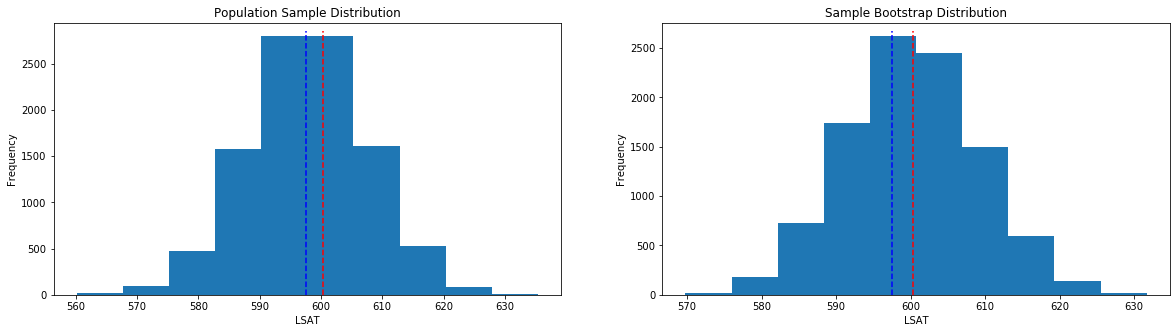

In [22]:
plt.figure(figsize=(20,5))

plt.subplot(121)
plt.hist(sampling_dist_pop_LSAT)
plt.axvline(LSAT_True_Mean,linestyle='--',color='b',ymax=0.97)
plt.axvline(LSAT_sample_Mean,linestyle='--',color='r',ymax=0.97)
plt.xlabel('LSAT')
plt.ylabel('Frequency')
plt.title('Population Sample Distribution')

plt.subplot(122)
plt.hist(sampling_dist_sample_LSAT)
plt.axvline(LSAT_True_Mean,linestyle='--',color='b',ymax=0.97)
plt.axvline(LSAT_sample_Mean,linestyle='--',color='r',ymax=0.97)
plt.xlabel('LSAT')
plt.ylabel('Frequency')
plt.title('Sample Bootstrap Distribution')
plt.show

**End of Module.**

You have reached the end of this module.

If you have any questions, please reach out to your peers using the discussion boards. If you and your peers are unable to come to a suitable conclusion, do not hesitate to reach out to your instructor on the designated discussion board.

When you are comfortable with the content, and have practiced to your satisfaction, you may proceed to any related assignments, and to the next module.

<a id='References'></a>
## References


Efron, B. & Tibshirani, R.J. (1994). *An Introduction to the Bootstrap, 1st Ed.,* Chapman and Hall/CRC, ISBN 9780412042317
